In [1]:
import numpy as np
import tensorflow as tf
import keras
from keras.utils import np_utils
from keras.layers import Input, Dense
from keras.models import Model
from keras import losses
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame

#Define Load embed
def load_embed(ind):
    doc_embed   = tf.constant(np.load(f"embeds_a/doc_embed_a{ind}.npy"))
    word_embed  = tf.constant(np.load(f"embeds_a/word_embed_a{ind}.npy"))
    topic_embed = tf.constant(np.load(f"embeds_a/topic_embed_a{ind}.npy"))
    return (doc_embed, word_embed, topic_embed)

#Define Topic Dist
def topic_dist(ind):
    embeds = load_embed(ind)
    doc_embed = embeds[0]
    topic_embed = embeds[2]
    norm_doc = tf.nn.softmax(doc_embed)
    topic_dist = tf.linalg.matmul(norm_doc, topic_embed)
    return topic_dist

Using TensorFlow backend.


In [2]:
#Load Data
data = load_embed(2)
data = data[0]
print(data.shape)
#Remove last 10 rows (aka 2017. Cant predict 2018 without data)
inputs = data[:-1, :]
print(inputs.shape)
#Remove first 1 row (aka 2008. Cant predict to 2008 without prev data)
outputs = data[1:, :]
print(outputs.shape)

(100, 40)
(99, 40)
(99, 40)


Epoch 1/20
10/10 [==============================] - 1s 107ms/step - loss: 1.4030 - cosine_similarity: 0.0436
Epoch 2/20
10/10 [==============================] - 0s 3ms/step - loss: 1.2118 - cosine_similarity: 0.3387
Epoch 3/20
10/10 [==============================] - 0s 2ms/step - loss: 1.0614 - cosine_similarity: 0.5340
Epoch 4/20
10/10 [==============================] - 0s 2ms/step - loss: 0.9654 - cosine_similarity: 0.6629
Epoch 5/20
10/10 [==============================] - 0s 3ms/step - loss: 0.8294 - cosine_similarity: 0.7770
Epoch 6/20
10/10 [==============================] - 0s 2ms/step - loss: 0.7246 - cosine_similarity: 0.8254
Epoch 7/20
10/10 [==============================] - 0s 2ms/step - loss: 0.6931 - cosine_similarity: 0.8354
Epoch 8/20
10/10 [==============================] - 0s 3ms/step - loss: 0.6813 - cosine_similarity: 0.8394
Epoch 9/20
10/10 [==============================] - ETA: 0s - loss: 0.6776 - cosine_similarity: 0.840 - 0s 2ms/step - loss: 0.6755 - cosine_si

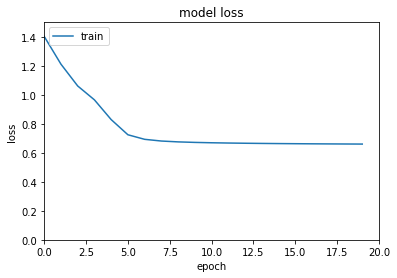

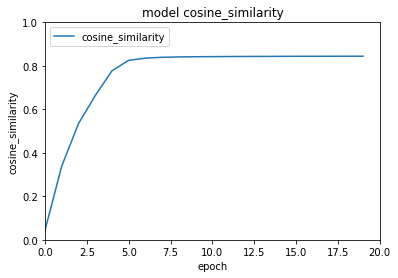

In [3]:
input_size = 40
hidden_size1 = 40
output_size = 40

input_data = Input(shape=(input_size,))
hidden_d_1 = Dense(hidden_size1, activation='tanh')(input_data)
predicted = Dense(output_size, activation='tanh')(hidden_d_1)

predictor = Model(input_data, predicted)
predictor.compile(optimizer='Adam', loss='msle', metrics=['cosine_similarity'] ) #Can also do MSE or MAE here for loss.

p = predictor.fit(inputs, outputs,
epochs=20,
steps_per_epoch=10,
shuffle=False)
#validation_data=(X_test, Y_test))

#Plotting loss
plt.plot(p.history['loss'])
#plt.plot(p.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
#plt.legend(['train', 'validation'], loc='upper left')
plt.axis([0, 20, 0, 1.5])
plt.show()

#Plotting Accuracy
plt.plot(p.history['cosine_similarity'])
#plt.plot(p.history['val_acc'])
plt.title('model cosine_similarity')
plt.ylabel('cosine_similarity')
plt.xlabel('epoch')
plt.legend(['cosine_similarity'], loc='upper left')
#plt.legend(['acc', 'val_acc'], loc='upper left')
plt.axis([0, 20, 0.0, 1])
plt.show()